This demo implements online stochastic gradient descent for estimating the three parameters of
a linear model.
1. Familiarize yourself with every step of the code. For information on stochastic gradient
descent, I recommend the following Wikipedia pages:
http://en.wikipedia.org/wiki/Stochastic_gradient_descent
http://en.wikipedia.org/wiki/Gradient_descent
http://en.wikipedia.org/wiki/Gradient
Reading the above pages will maximize the opportunity for you to learn about optimization
on Thursday’s lecture. (This task is ommitted)

2. Modify section 5 of the code (Test the trained model) to compute the predictions for
the following test dataset of three observations and two input features (fertilizer and
insecticide):
dataTest = torch.Tensor{
{6, 4},
{10, 5},
{14, 8}
}
What are the values of the three parameters? What happens to the parameters and
predictions when the number of epochs is either 1e3 (1 × 10 3 ) or 1e5 (1 × 10 5 )? Hand in
the answers to these questions.

3. Implement the least squares solution
θ = (X T X) −1 X T y
using the same dataset. What are the predictions for the above test set? How do they
compare to the predictions of the linear neuron trained with SGD? How do the parameters
compare? Hand in your answers.

#### Advanced: For enthusiastic students ####
Implement the nonlinear regression demos with polynomials described in Lecture 3. That is,
generate data with a second order polynomial and use polynomials of different orders to estimate
the nonlinear regression function. Confirm what happens as you vary the number of data, and
the regularization coefficient.

In [183]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

train_data = torch.Tensor([
   [40,  6,  4],
   [44, 10,  4],
   [46, 12,  5],
   [48, 14,  7],
   [52, 16,  9],
   [58, 18, 12],
   [60, 22, 14],
   [68, 24, 20],
   [74, 26, 21],
   [80, 32, 24]])
test_data = torch.Tensor([
    [6, 4],
    [10, 5],
    [4, 8]])

#### Task 2

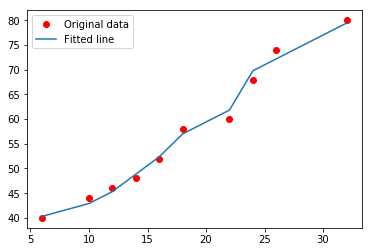

Variable containing:
 40.3159
 44.0286
 43.4505
[torch.FloatTensor of size 3x1]

1.3670417070388794
learnt parameters:  [Parameter containing:
 0.6509  1.1091
[torch.FloatTensor of size 1x2]
, Parameter containing:
 31.9741
[torch.FloatTensor of size 1]
]


In [137]:
# Hyper Parameters
input_size = 2
output_size = 1
num_epochs = 100000
learning_rate = 0.001


x_train = train_data[:,1:3]
y_train = train_data[:,0]

# Linear Regression Model
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)  
    
    def forward(self, x):
        out = self.linear(x)
        return out

model = LinearRegression(input_size, output_size)

# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Train the Model 
losses1 = []
for epoch in range(num_epochs):
    # Convert numpy array to torch Variable
    inputs = Variable(x_train)
    targets = Variable(y_train)

    # Forward + Backward + Optimize
    optimizer.zero_grad()  
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    losses1.append(loss.data[0])
    optimizer.step()
    
#     if (epoch+1) % 5 == 0:
#         print ('Epoch [%d/%d], Loss: %.4f' 
#                %(epoch+1, num_epochs, loss.data[0]))
        
# Plot the graph
predicted = model(inputs).data.numpy()
plt.plot(x_train.numpy()[0:,0], y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy()[0:,0], predicted, label='Fitted line')
plt.legend()
plt.show()

# using test data to make prediction
predicted_test = model(Variable(test_data))
print(predicted_test)
print(loss.data[0])
print("learnt parameters: ", list(model.parameters()))
# Save the Model
# torch.save(model, 'model.pkl')


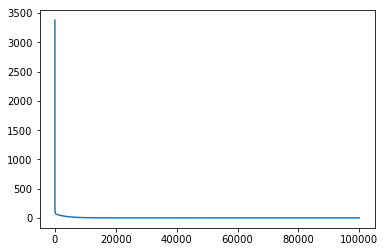

In [138]:
plt.plot(losses1)
plt.show()

- with the number of epochs 1000: the Loss = 53.7466, 
    predictions = [21.8778, 36.4507, 5.1435]
    weights:
        coefficients/weights = 4.2680, -2.1907
        intercept = 4.5083

    
- with the number of epochs 10000: the Loss = 5.4
    predictions = [35.1809, 41.9191, 32.7792]
    weights:
        coefficients/weights =  1.6308  0.2150
        intercept =  24.5361

- with the number of epochs 100000: the Loss = 1.3670
    predictions = [40.3159, 44.0286, 43.4505]
    weights:
        coefficients/weights =  0.6509  1.1091
        intercept =  31.9741
        
#### Conclusion: the MSE improves considerably with increased number of epochs

#### Task 2 - Different code

n_iter 99999
1.3670417070388794


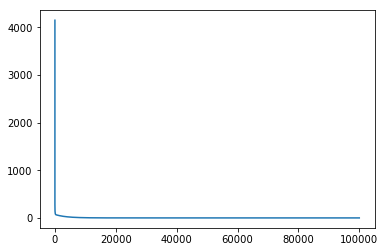

In [432]:
# another Linear model option for the same problem as above (from forum)
x = Variable(train_data[:,1:3])
y = Variable(train_data[:,0])


def poly_desc(W, b):
    """Creates a string description of a polynomial."""
    result = 'y = '
    for i, w in enumerate(W):
        result += '{:+.2f} x^{} '.format(w, len(W) - i)
    result += '{:+.2f}'.format(b[0])
    return result




class Model(torch.nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        self.fc = torch.nn.Linear(2, 1)
                
    def forward(self, x):
        return self.fc(x)
            
model = Model()    
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

losses = [] # Added

for i in range(100000):
    optimizer.zero_grad()
    outputs = model(x)
    
    loss = criterion(outputs, y)

    losses.append(loss.data[0]) # Added
    loss.backward()    
    
    optimizer.step()
    
    if loss.data[0] < 1e-4:
        break    
    
print('n_iter', i)
print(loss.data[0])
plt.plot(losses)
plt.show()


In [555]:
# Linear Regression with sklearn
import numpy as np
from sklearn import linear_model

X1 = train_data[:,1:3].numpy()
y1 = train_data[:,0].numpy()

reg = LinearRegression()
reg.fit(X1, y1)
reg.score(X1,y1)
np.mean((reg.predict(X1) - y1) ** 2)


1.3670396744666391

### Advanced: Create a model with polynomial features

[393494300459008.0, inf, inf, inf, nan, nan, nan, nan, nan, nan]
n_iter 9
nan


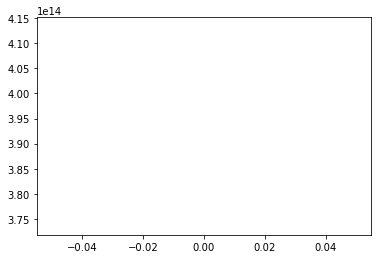

In [588]:
# code for polynomial Linear Regression - doesn't work yet
import sklearn.linear_model as lm
from sklearn.preprocessing import PolynomialFeatures
import torch
import torch.autograd
import torch.nn.functional as F
from torch.autograd import Variable


train_data = torch.Tensor([
   [40,  6,  4],
   [44, 10,  4],
   [46, 12,  5],
   [48, 14,  7],
   [52, 16,  9],
   [58, 18, 12],
   [60, 22, 14],
   [68, 24, 20],
   [74, 26, 21],
   [80, 32, 24]])
test_data = torch.Tensor([
    [6, 4],
    [10, 5],
    [4, 8]])

x_train = train_data[:,1:3]
y_train = train_data[:,0]

POLY_DEGREE = 3
input_size = 2
output_size = 1

poly = PolynomialFeatures(input_size * POLY_DEGREE, include_bias=False)
x_train_poly = poly.fit_transform(x_train.numpy())


class Model(torch.nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        self.fc = torch.nn.Linear(poly.n_output_features_, output_size)
                
    def forward(self, x):
        return self.fc(x)
            
model = Model()    
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

losses = [] # Added

for i in range(10):
    optimizer.zero_grad() # step 1 - zero out the gradients
    outputs = model(Variable(torch.Tensor(x_train_poly))) # step 2 
    # feed the input to the model and calculate results

    loss = criterion(outputs, Variable(y_train)) # step 3 - calculate loss
#   difference between real label and resluts of the model
    losses.append(loss.data[0])
    loss.backward()  # step 4 propagate loss backwards, estimate error?  
    optimizer.step() # step 5 optimize with SGD and repeat till done
    if loss.data[0] < 1e-4:
        break    
print(losses)
print('n_iter', i)
print(loss.data[0])
plt.plot(losses)
plt.show()

In [581]:
# Prediction of new value with test_data
model(Variable(torch.Tensor(poly.fit_transform(test_data.numpy()))))

Variable containing:
nan
nan
nan
[torch.FloatTensor of size 3x1]

In [547]:
# working version but with sklearn, not Pytorch
import sklearn.linear_model as lm
from sklearn.preprocessing import PolynomialFeatures
regr = lm.LinearRegression()
poly = PolynomialFeatures(4, include_bias=False)
X_poly = poly.fit_transform(x_train.numpy())

regr.fit(x_train.numpy(), y_train.numpy())
pred = regr.predict(test_data.numpy())
pred

array([ 40.32044911,  44.03051972,  43.45981896])

In [256]:
# original code for polynomial Linear Regression - for reference purposes only
from __future__ import print_function
from itertools import count

import torch
import torch.autograd
import torch.nn.functional as F
from torch.autograd import Variable

POLY_DEGREE = 4
W_target = torch.randn(POLY_DEGREE, 1) * 5
b_target = torch.randn(1) * 5


def make_features(x):
    """Builds features i.e. a matrix with columns [x, x^2, x^3, x^4]."""
    x = x.unsqueeze(1)
    return torch.cat([x ** i for i in range(1, POLY_DEGREE+1)], 1)


def f(x):
    """Approximated function."""
    return x.mm(W_target) + b_target[0]


def poly_desc(W, b):
    """Creates a string description of a polynomial."""
    result = 'y = '
    for i, w in enumerate(W):
        result += '{:+.2f} x^{} '.format(w, len(W) - i)
    result += '{:+.2f}'.format(b[0])
    return result


def get_batch(batch_size=32):
    """Builds a batch i.e. (x, f(x)) pair."""
    random = torch.randn(batch_size)
    x = make_features(random)
    y = f(x)
    return Variable(x), Variable(y)


# Define model
fc = torch.nn.Linear(W_target.size(0), 1)

for batch_idx in count(1):
    # Get data
    batch_x, batch_y = get_batch()

    # Reset gradients
    fc.zero_grad()

    # Forward pass
    output = F.smooth_l1_loss(fc(batch_x), batch_y)
    loss = output.data[0]

    # Backward pass
    output.backward()

    # Apply gradients
    for param in fc.parameters():
        param.data.add_(-0.1 * param.grad.data)

    # Stop criterion
    if loss < 1e-3:
        break

print('Loss: {:.6f} after {} batches'.format(loss, batch_idx))
print('==> Learned function:\t' + poly_desc(fc.weight.data.view(-1), fc.bias.data))
print('==> Actual function:\t' + poly_desc(W_target.view(-1), b_target))

Loss: 0.000325 after 504 batches
==> Learned function:	y = -2.13 x^4 +2.85 x^3 +4.06 x^2 -1.09 x^1 -4.78
==> Actual function:	y = -2.13 x^4 +2.76 x^3 +4.08 x^2 -1.05 x^1 -4.77
